## __EDA FOR VIDEO GAMES__

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 20)

In [6]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### So i was about to make the rank column but i could see that it is not well numbered, so i'm just going to check kaggle to see if it was a mistake of the column has a meaning to it

#### _So after checking kaggle, I saw that the Rank column means the ranking of overall sales so it should have a +ve correlation with global\_sales. I also saw that the reason why we have only 16598 rows and out rank is numbered from 1 to 16600 is that 2 rows were dropped because of incomplete information_

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### _I can see that we have missing data_

In [8]:
missing_series = df.isnull().sum().sort_values(ascending=False)
missing_series

Year            271
Publisher        58
Rank              0
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### _Only Year and publisher have missing data_

Text(0, 0.5, 'No of mising data')

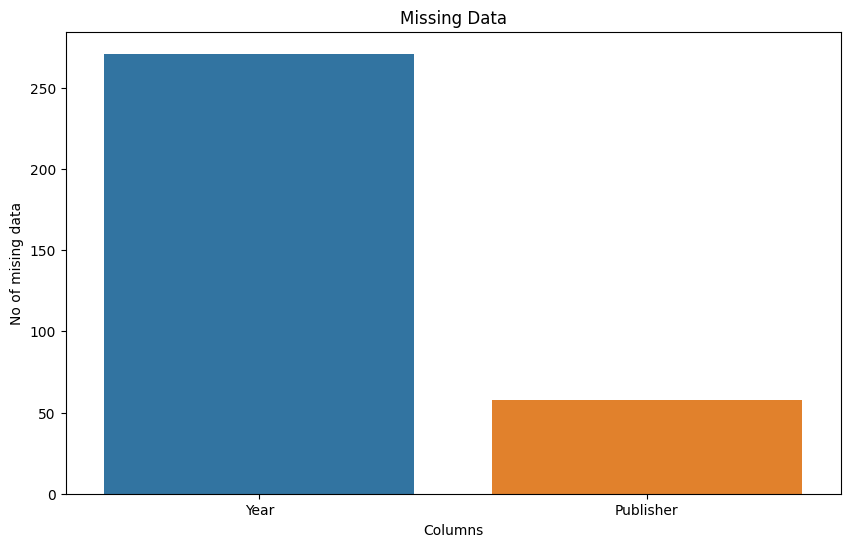

In [9]:
missing_series = missing_series[missing_series > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_series.index, y=missing_series)
plt.title("Missing Data")
plt.xlabel('Columns')
plt.ylabel('No of mising data')

Text(0, 0.5, 'No of mising data')

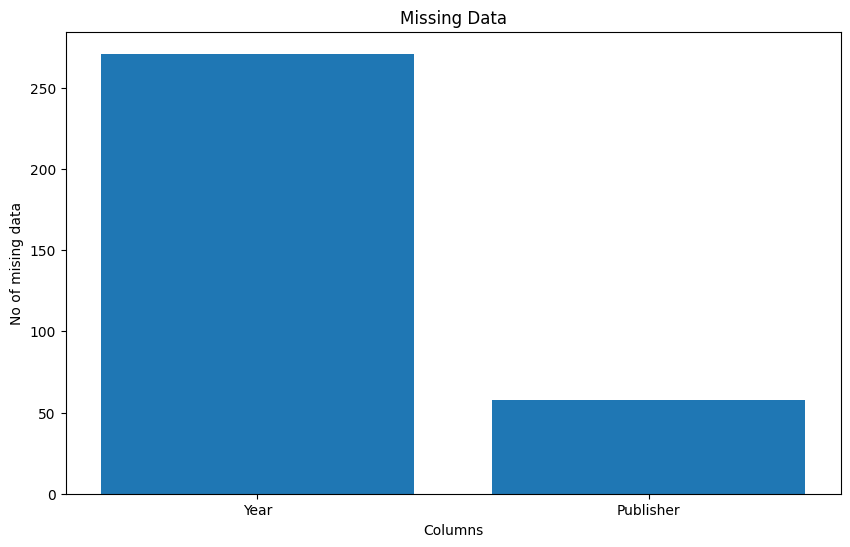

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(missing_series.index, missing_series)
plt.title("Missing Data")
plt.xlabel('Columns')
plt.ylabel('No of mising data')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


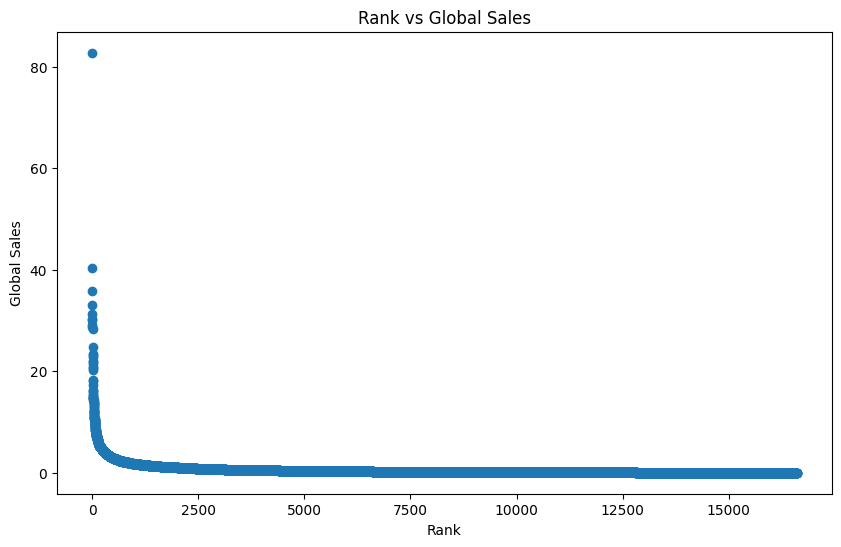

In [12]:
# i want to validate my guess on rank and global_sales having very strong +ve correlation

plt.figure(figsize=(10, 6))
plt.title('Rank vs Global Sales')
plt.xlabel('Rank')
plt.ylabel('Global Sales')
plt.scatter(df['Rank'], df['Global_Sales'])

<AxesSubplot:title={'center':'Rank vs Global Sales'}, xlabel='Rank', ylabel='Global Sales'>

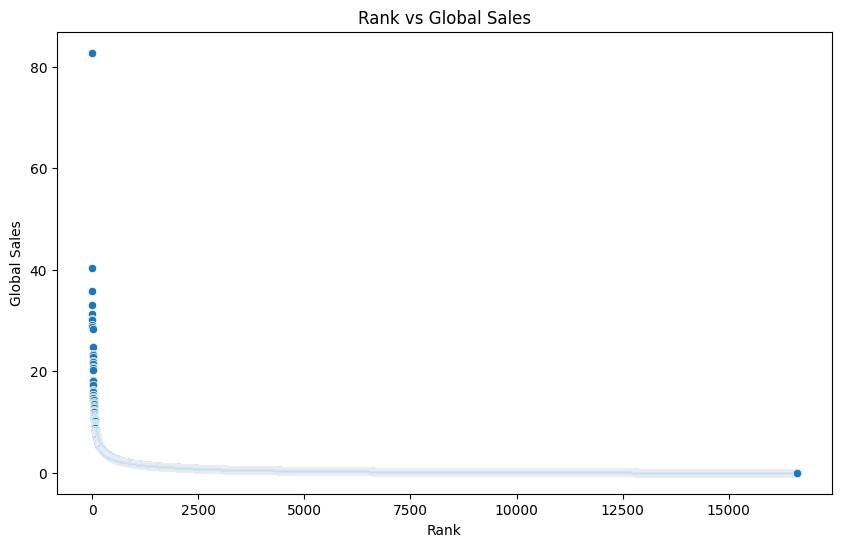

In [13]:
# i want to validate my guess on rank and global_sales having very strong +ve correlation

plt.figure(figsize=(10, 6))
plt.title('Rank vs Global Sales')
plt.xlabel('Rank')
plt.ylabel('Global Sales', )
sns.scatterplot(x=df['Rank'], y=df['Global_Sales'])

#### _So the thing is that rank goes from 1 to x and so as rank increases, the global sales should reduce because number 1 ranked should have the most sales_

#### _But the relationship is not a strong +ve correlation because we can see that at some point, the line starts to flatten out_

### __I want to see if the North America + Japan + European sales == Global Sales__

In [14]:
df['Supposed Global Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['Supposed Global Sales'] == df['Global_Sales']

0        False
1         True
2        False
3         True
4        False
         ...  
16593     True
16594     True
16595    False
16596     True
16597     True
Length: 16598, dtype: bool

In [15]:
def compare_supposed_Global_Sales(x):
    if x['Supposed Global Sales'] == x['Global_Sales']:
        return 'Equal'
    elif x['Supposed Global Sales'] > x['Global_Sales']:
        return 'Greater'
    else:
        return 'Less'

In [16]:
df['Compared Supposed Against Actual Global Sales'] = df.apply(compare_supposed_Global_Sales, axis=1)

In [17]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,Greater
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,Equal
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,Greater
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,Equal
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,Greater
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01,Equal
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01,Equal
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,Less
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01,Equal


<AxesSubplot:xlabel='Compared Supposed Against Actual Global Sales', ylabel='count'>

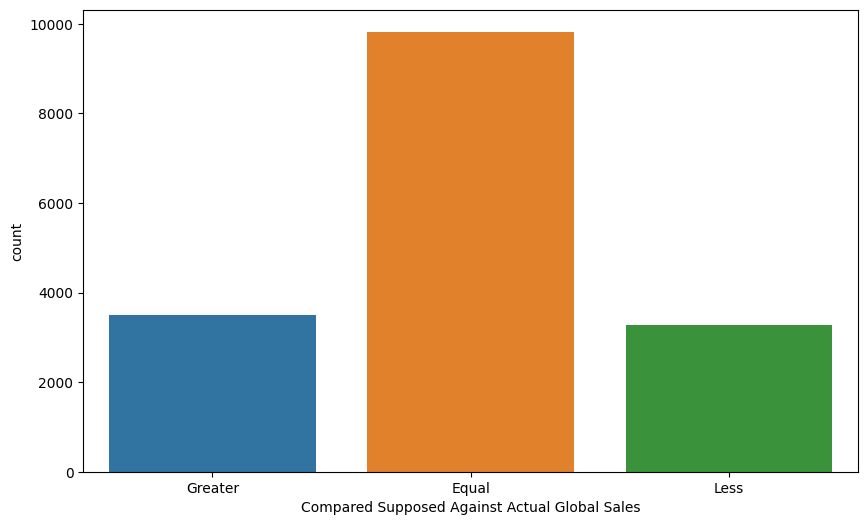

In [18]:
plt.figure(figsize=(10, 6))
plt.xlabel('Comparator')
sns.countplot(x='Compared Supposed Against Actual Global Sales', data=df)

#### _We can see that most of them are equal. But there are still some variations_

In [19]:
df['difference_between_supposed_global'] = df['Supposed Global Sales'] - df['Global_Sales']
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales,difference_between_supposed_global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,Greater,1.421085e-14
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,Equal,0.000000e+00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,Greater,1.000000e-02
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,Equal,0.000000e+00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,Greater,1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,Less,-1.000000e-02
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01,Equal,0.000000e+00


#### _From here, I can see that the difference between the supposed and gloabl sales is actually very minute_

## __Time to answer some questions__

- #### _Which platform has the most games released on it_

In [20]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [21]:
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
        ... 
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, Length: 31, dtype: int64

Text(0, 0.5, '')

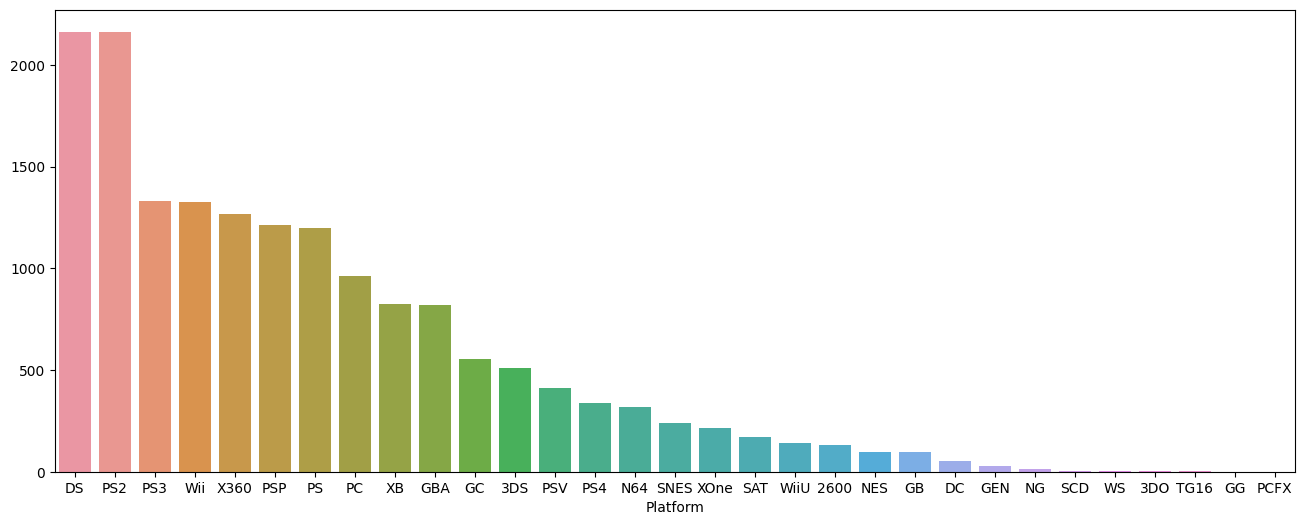

In [22]:
category_counts = df['Platform'].value_counts()

plt.figure(figsize=(16, 6))
sns.countplot(x="Platform", data=df, order=category_counts.index)
plt.ylabel('')

#### _ANS: DS is the platform where most games are released on_

- #### _Another question is that why is DS that platform? Maybe it has something to do with the genre of games or maybe publishers jsust liked the platform_

In [23]:
df_ds = df[df['Platform'] == 'DS']
df_ds

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales,difference_between_supposed_global
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,30.01,Less,-3.552714e-15
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,24.75,Less,-1.000000e-02
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,23.43,Greater,1.000000e-02
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22,20.22,Greater,3.552714e-15
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,18.35,Less,-1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,16589,Secret Files 2: Puritas Cordis,DS,2009.0,Adventure,Deep Silver,0.00,0.01,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16587,16590,Mezase!! Tsuri Master DS,DS,2009.0,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01,0.01,Equal,0.000000e+00
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00


In [24]:
df_ds['Genre'].unique()

array(['Platform', 'Simulation', 'Racing', 'Misc', 'Role-Playing',
       'Puzzle', 'Action', 'Sports', 'Adventure', 'Strategy', 'Shooter',
       'Fighting'], dtype=object)

In [25]:
df_ds['Genre'].value_counts()

Misc            393
Action          343
Simulation      285
Adventure       240
Puzzle          238
Role-Playing    200
Sports          148
Platform         92
Strategy         79
Racing           67
Shooter          42
Fighting         36
Name: Genre, dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='count'>

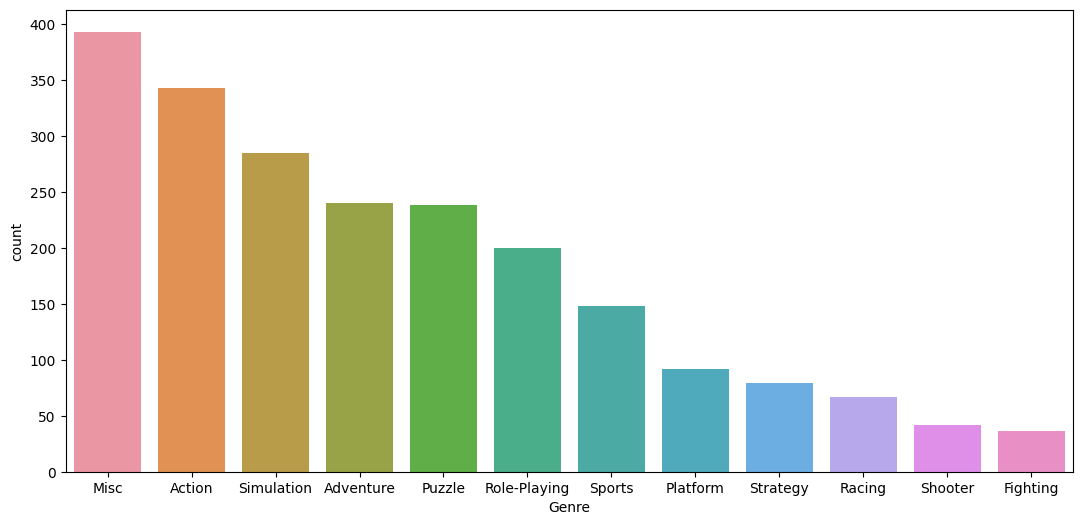

In [26]:
plt.figure(figsize=(13, 6))
sns.countplot(x=df_ds['Genre'], order=df_ds['Genre'].value_counts().index)

#### _I'm going to come back to finding out why DS is the most popular platform_

In [27]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales,difference_between_supposed_global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,Greater,1.421085e-14
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,Equal,0.000000e+00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,Greater,1.000000e-02
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,Equal,0.000000e+00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,Greater,1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,Less,-1.000000e-02
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01,Equal,0.000000e+00


- #### _Which year has the most released games_

In [28]:
df.Year.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [29]:
df.Year.value_counts().iloc[:10]

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

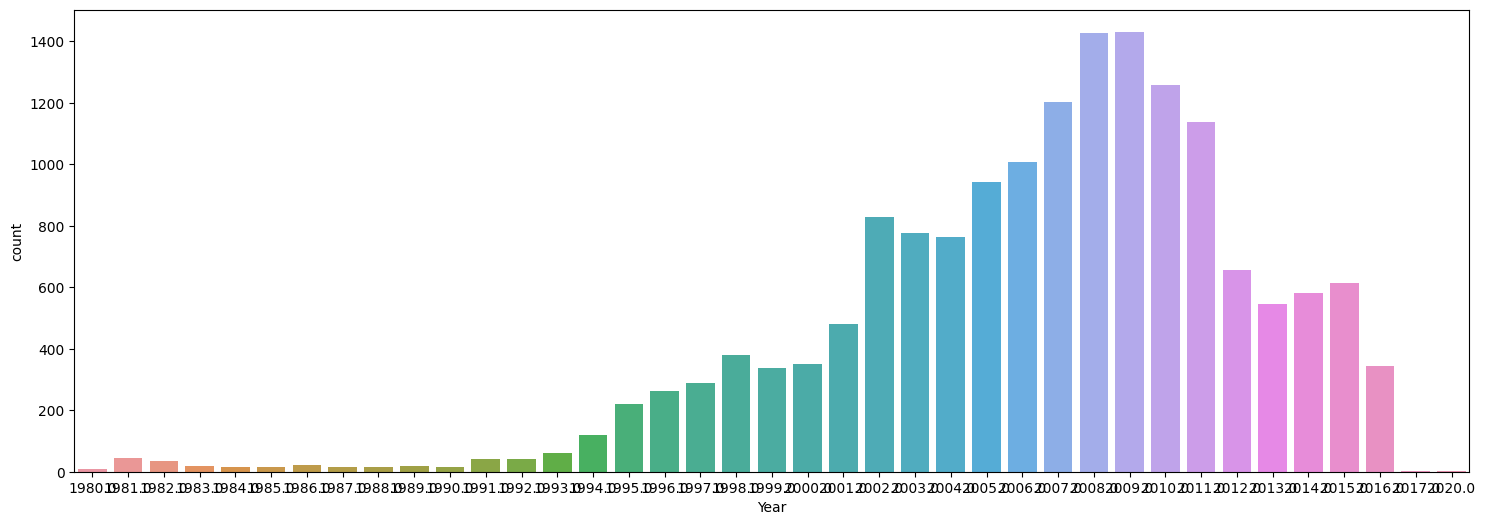

In [30]:
plt.figure(figsize=(18, 6))
sns.countplot(x=df['Year'])

#### _I want to see the trend in the number of games released every year_

Text(0, 0.5, 'No of Games')

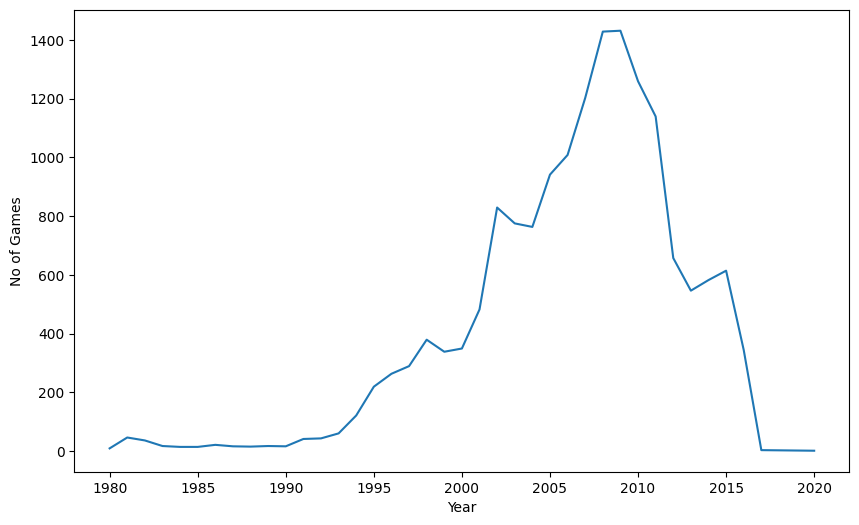

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Year'].value_counts().index, y=df['Year'].value_counts(), )
plt.xlabel("Year")
plt.ylabel("No of Games")

#### _The Trend: it increased significantly from 1980 to 2009 and started dropping significantly_

#### _so 2009 has the most games released. I am going to explore the games released in years with over 1000 games._

- #### _In which Genre is the most games released in?_

<AxesSubplot:ylabel='Genre'>

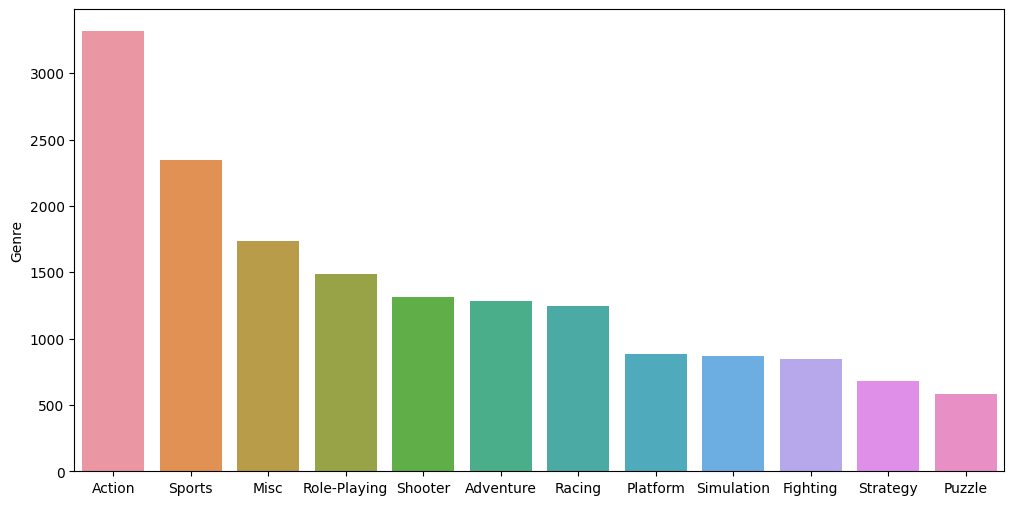

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Genre'].value_counts().index, y=df['Genre'].value_counts())

#### _Action games has the most games released in it_

#### _Which genre has the most sales?_

In [33]:
df_top_sales_Genre_Games = df.groupby('Genre')[['Global_Sales']].max().sort_values(by='Global_Sales', ascending=False)
df_top_sales_Genre_Games


,Global_Sales
Genre,
Sports,82.74
Platform,40.24
Racing,35.82
Role-Playing,31.37
Puzzle,30.26
Misc,29.02
Shooter,28.31
Simulation,24.76
Action,21.40


<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

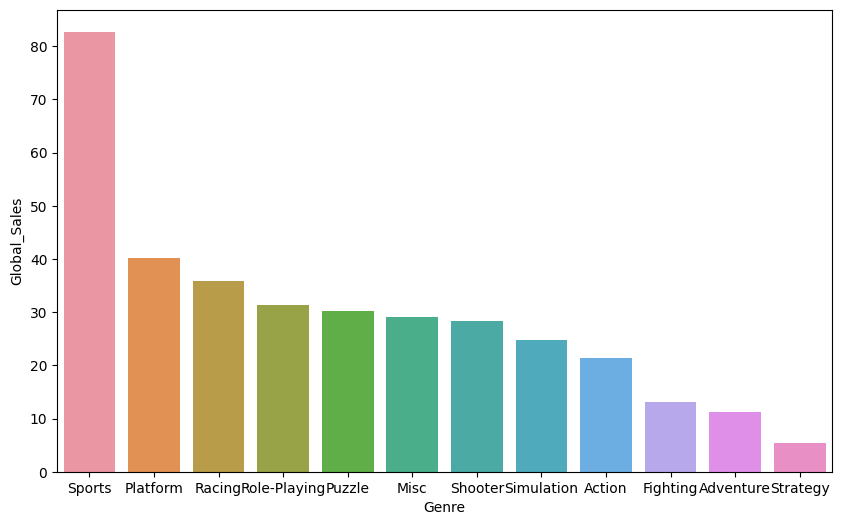

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_top_sales_Genre_Games.index, y=df_top_sales_Genre_Games['Global_Sales'])

#### _Sports have the most sales_

#### _In each genre, what is the top selling games?_

In [35]:
df_top_sales_Genre_Games = df.groupby('Genre').max(numeric_only=True).sort_values(by="Global_Sales", ascending=False)
df_top_sales_Genre_Games

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,difference_between_supposed_global
Genre,,,,,,,,,
Sports,16590,2016.0,41.49,29.02,3.77,8.46,82.74,82.74,0.01
Platform,16600,2016.0,29.08,9.23,6.81,2.90,40.24,40.24,0.01
Racing,16598,2016.0,15.85,12.88,4.13,7.53,35.82,35.83,0.02
Role-Playing,16593,2017.0,11.27,8.89,10.22,1.74,31.37,31.38,0.01
Puzzle,16599,2015.0,23.20,5.36,5.32,1.18,30.26,30.26,0.01
Misc,16545,2016.0,14.97,9.26,4.16,2.85,29.02,29.01,0.01
Shooter,16597,2016.0,26.93,5.88,1.44,2.52,28.31,28.31,0.01
Simulation,16595,2020.0,9.07,11.00,5.33,2.75,24.76,24.75,0.01
Action,16592,2017.0,9.63,9.27,3.96,10.57,21.40,21.39,0.02


#### _I kept the table above to tell you something. Doing the max, every value you see in each cell is showing the max of each column when you grouped by Genre. So they can be misleading as each row in the above table doesn't correspond to any row in the original dataframe_

In [36]:
df_top_sales_Genre_Games = df[df['Global_Sales'].isin(df_top_sales_Genre_Games['Global_Sales'])]
df_top_sales_Genre_Games.loc[:, ["Genre", "Name"]]

,Genre,Name
0,Sports,Wii Sports
1,Platform,Super Mario Bros.
2,Racing,Mario Kart Wii
4,Role-Playing,Pokemon Red/Pokemon Blue
5,Puzzle,Tetris
7,Misc,Wii Play
9,Shooter,Duck Hunt
10,Simulation,Nintendogs
16,Action,Grand Theft Auto V
39,Fighting,Super Smash Bros. Brawl


- #### _Another question would be which publisher publishes the most_

In [37]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [38]:
df['Publisher'].nunique()

578

In [39]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [40]:
df['Publisher'].value_counts()[df['Publisher'].value_counts() > 200]

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Name: Publisher, dtype: int64

#### _Since there are quite a lot of publishers, I'm just going to be exploring the major ones i.e the ones with over 100 games_

In [41]:
publishers_to_be_explored = df['Publisher'].value_counts()[df['Publisher'].value_counts() > 200]

In [42]:
publishers_to_be_explored

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Name: Publisher, dtype: int64

In [43]:
df_major_publishers = df[df['Publisher'].isin(publishers_to_be_explored.index)]
df_major_publishers

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales,difference_between_supposed_global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,Greater,1.421085e-14
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,Equal,0.000000e+00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,Greater,1.000000e-02
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,Equal,0.000000e+00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,Greater,1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16575,16578,Neo Angelique Special,PSP,2008.0,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,0.01,Equal,0.000000e+00
16581,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16584,16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00


<AxesSubplot:xlabel='Publisher', ylabel='count'>

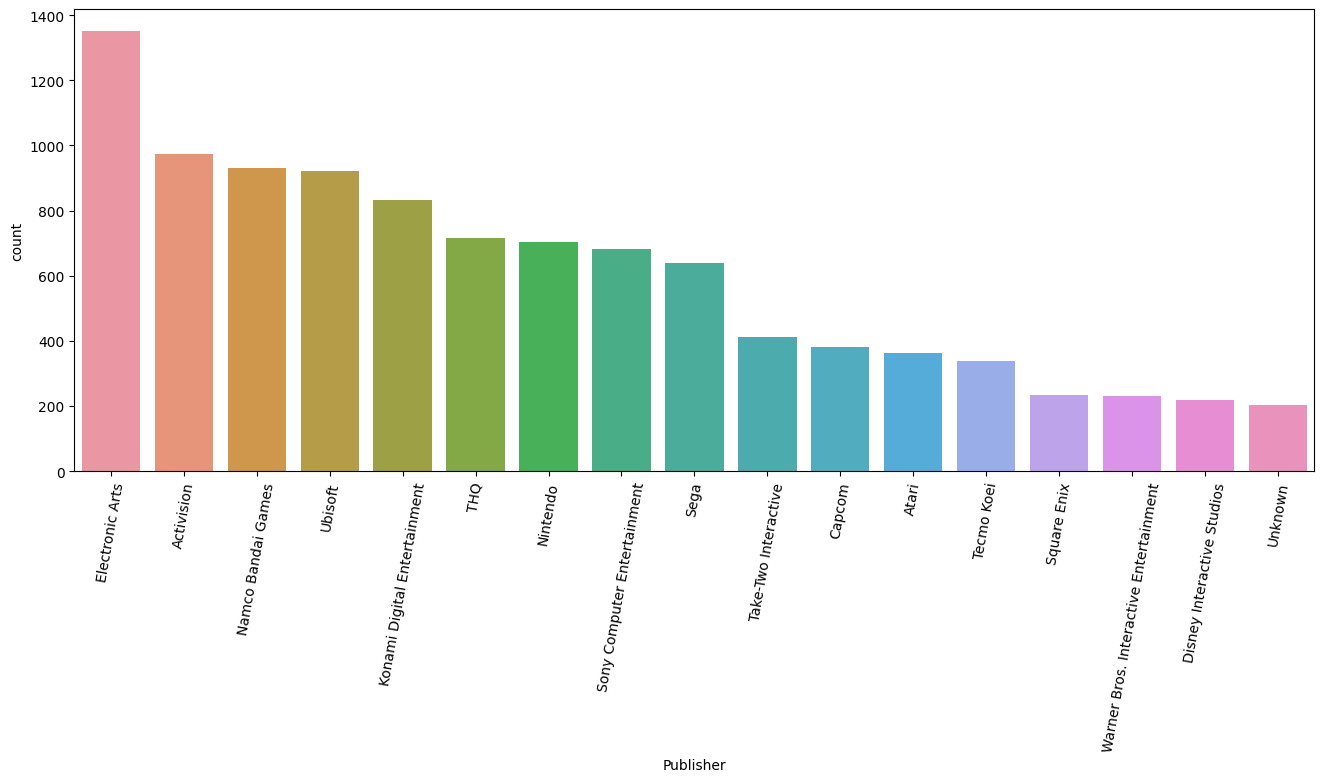

In [44]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=80)
sns.countplot(x='Publisher', data=df_major_publishers, order=df_major_publishers['Publisher'].value_counts().index)

#### _We see that EA sports is the publisher that publishes the most games_

#### _What Genre of games is published most by EA?_

In [45]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales,difference_between_supposed_global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,Greater,1.421085e-14
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,Equal,0.000000e+00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,Greater,1.000000e-02
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,Equal,0.000000e+00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,Greater,1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,Less,-1.000000e-02
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01,Equal,0.000000e+00


In [46]:
df_EA = df[df['Publisher'] == 'Electronic Arts']
df_EA

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales,difference_between_supposed_global
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,8.49,Equal,0.00
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24,8.25,Greater,0.01
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11,8.11,Equal,0.00
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67,7.67,Equal,0.00
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34,7.34,Equal,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16339,16342,Command & Conquer Renegade,PC,2002.0,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01,0.01,Equal,0.00
16384,16387,Poker for Dummies,PC,2008.0,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01,0.01,Equal,0.00
16413,16416,The Godfather (JP sales),X360,2006.0,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01,0.01,Equal,0.00
16539,16542,Spore Galactic Adventures,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01,0.01,Equal,0.00


<AxesSubplot:xlabel='Genre', ylabel='count'>

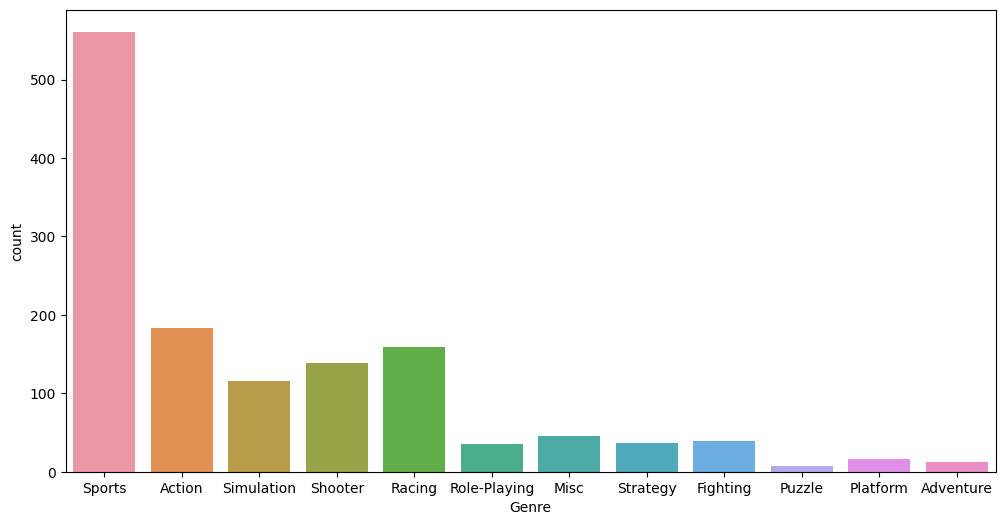

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_EA['Genre'])

#### _Well it turns out Electronic Arts live up to their name EA Sports_

#### _Now I want to see the sports games they made_

In [48]:
df_EA[df_EA["Genre"] == 'Sports']["Name"]

77                               FIFA 16
112                              FIFA 14
121                              FIFA 12
124                              FIFA 15
179                      Madden NFL 2004
                      ...               
15802                   Football Academy
15837                     FIFA Soccer 08
16012    UEFA Champions League 2006-2007
16127                      Madden NFL 13
16162          Tiger Woods PGA Tour 2005
Name: Name, Length: 561, dtype: object

#### _I'm thinking their most published sport game would be FIFA, so time to validate that_

In [49]:
df_EA[df_EA["Genre"] == 'Sports']["Name"].str.contains('FIFA').sum()

134

#### _So they have 134 published FIFA games_

In [50]:
df_EA_FIFA = df_EA[df_EA["Genre"] == 'Sports'][df_EA[df_EA["Genre"] == 'Sports']["Name"].str.contains('FIFA')]
df_EA_FIFA

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales,difference_between_supposed_global
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,8.49,Equal,0.00
112,113,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90,6.90,Equal,0.00
121,122,FIFA 12,PS3,2011.0,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69,6.69,Equal,0.00
124,125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59,6.60,Greater,0.01
199,200,FIFA Soccer 11,PS3,2010.0,Sports,Electronic Arts,0.60,3.29,0.06,1.13,5.08,5.08,Equal,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13611,13613,FIFA Soccer 2003 (weekly jp sales),PS2,2002.0,Sports,Electronic Arts,0.00,0.00,0.04,0.00,0.04,0.04,Equal,0.00
13851,13853,FIFA World Cup Germany 2006,DS,2006.0,Sports,Electronic Arts,0.03,0.00,0.00,0.00,0.04,0.03,Less,-0.01
14251,14254,FIFA World Cup: Germany 2006,GBA,2006.0,Sports,Electronic Arts,0.02,0.01,0.00,0.00,0.03,0.03,Equal,0.00
15205,15208,FIFA Soccer 09,PC,2008.0,Sports,Electronic Arts,0.00,0.02,0.00,0.00,0.02,0.02,Equal,0.00


#### _Another questoin would be what platform was FIFA most published on_

<AxesSubplot:xlabel='Platform', ylabel='count'>

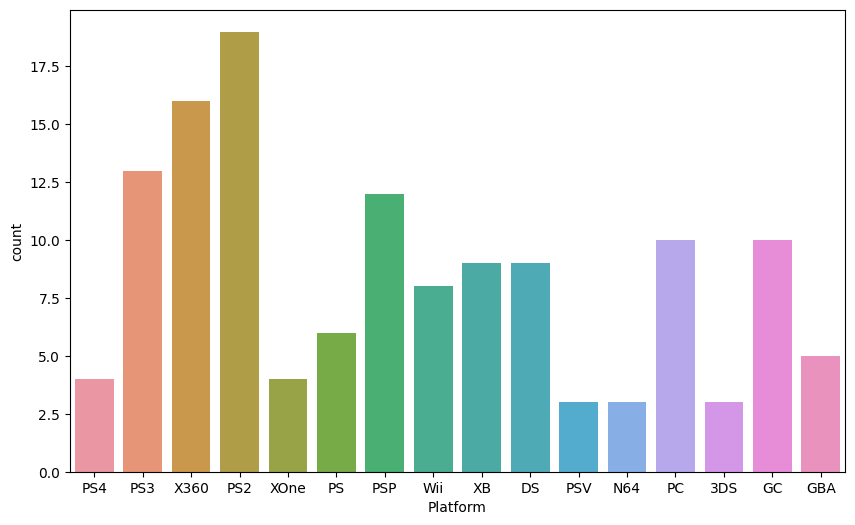

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df_EA_FIFA['Platform'])

#### _The Answer is PS2_

#### _Another question would be what were FIFA games that were published on PS2_

In [52]:
df_EA_FIFA[df_EA_FIFA['Platform'] == "PS2"]["Name"]

269                          FIFA Soccer 06
283                          FIFA Soccer 07
334                        FIFA Soccer 2005
377                        FIFA Soccer 2004
392                        FIFA Soccer 2003
440                          FIFA Soccer 08
701                          FIFA Soccer 09
1050                         FIFA Soccer 10
2487         FIFA Soccer World Championship
2709                         FIFA Soccer 11
3224                       FIFA Soccer 2002
3405                    2002 FIFA World Cup
3542            FIFA World Cup Germany 2006
5143                          FIFA Street 2
5722                            FIFA Street
10711                Project FIFA World Cup
10989        FIFA 2001: Major League Soccer
11224                               FIFA 12
13611    FIFA Soccer 2003 (weekly jp sales)
Name: Name, dtype: object

- #### _Question: The number of each genres publishers have published_

<AxesSubplot:xlabel='Publisher', ylabel='count'>

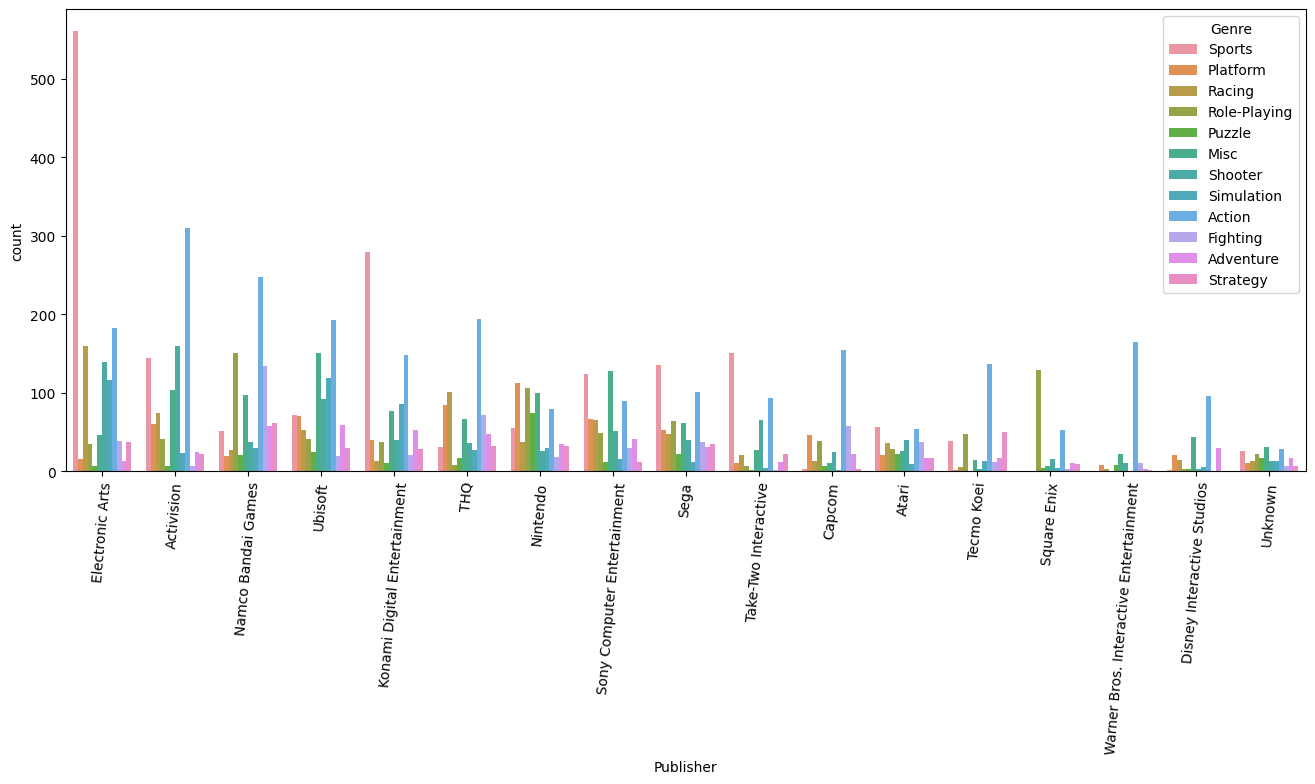

In [53]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=85)
sns.countplot(x='Publisher', hue='Genre', data=df_major_publishers, order=publishers_to_be_explored.index)

#### _So, we can see that most publishers have mostly published action games and the only games that have mainly ever beat action are sport games from EA and Konami and others_ 

#### _The year is of type float so i am going to change it to int_

#### _Which genre is published most every year considering only major years of publications_

In [54]:
year_greater_1000 = df['Year'].value_counts() > 1000
year_greater_1000 = year_greater_1000[year_greater_1000 == True]
df_year_over_1000_games = df[df['Year'].isin(year_greater_1000.index)]
df_year_over_1000_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales,difference_between_supposed_global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,Greater,1.421085e-14
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,Greater,1.000000e-02
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,Equal,0.000000e+00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,30.01,Less,-3.552714e-15
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,29.01,Less,-1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01,0.01,Equal,0.000000e+00
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,Less,-1.000000e-02


<AxesSubplot:xlabel='Year', ylabel='count'>

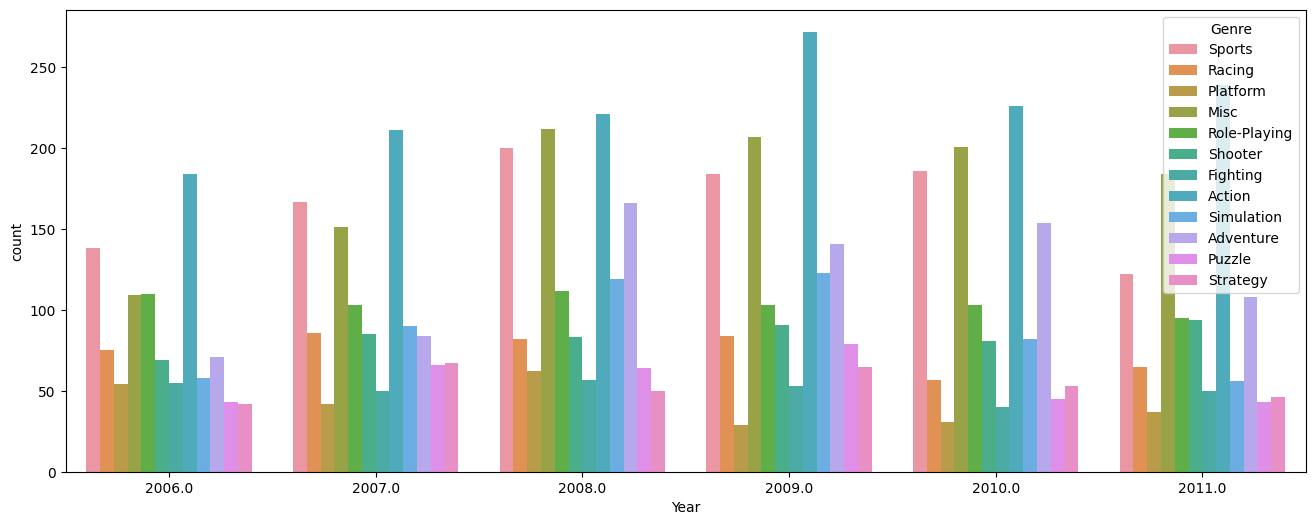

In [55]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Year', hue='Genre', data=df_year_over_1000_games)

#### _We can see that every  year, action games be topping the chart_

## __So I think I have done a lot on Platfroms, Year, Genre, Publisher. Now i want to go to the sales__

In [56]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales,difference_between_supposed_global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,Greater,1.421085e-14
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,Equal,0.000000e+00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,Greater,1.000000e-02
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,Equal,0.000000e+00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,Greater,1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,Less,-1.000000e-02
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01,Equal,0.000000e+00


#### _So I have shown that there are some inconsistencies from our data particularly in our global sales since it is not matching the summation of other sales_

#### _Now, Let's see how much each publisher has made_ 

#### _Which publisher has earned the most_

In [57]:
top_sales_df = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)[df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False) > 100]
top_sales_df

Publisher
Nintendo                                  1786.56
Electronic Arts                           1110.32
Activision                                 727.46
Sony Computer Entertainment                607.50
Ubisoft                                    474.72
Take-Two Interactive                       399.54
THQ                                        340.77
Konami Digital Entertainment               283.64
Sega                                       272.99
Namco Bandai Games                         254.09
Microsoft Game Studios                     245.79
Capcom                                     200.89
Atari                                      157.22
Warner Bros. Interactive Entertainment     153.89
Square Enix                                145.18
Disney Interactive Studios                 119.96
Name: Global_Sales, dtype: float64

Text(0, 0.5, 'Global Sales')

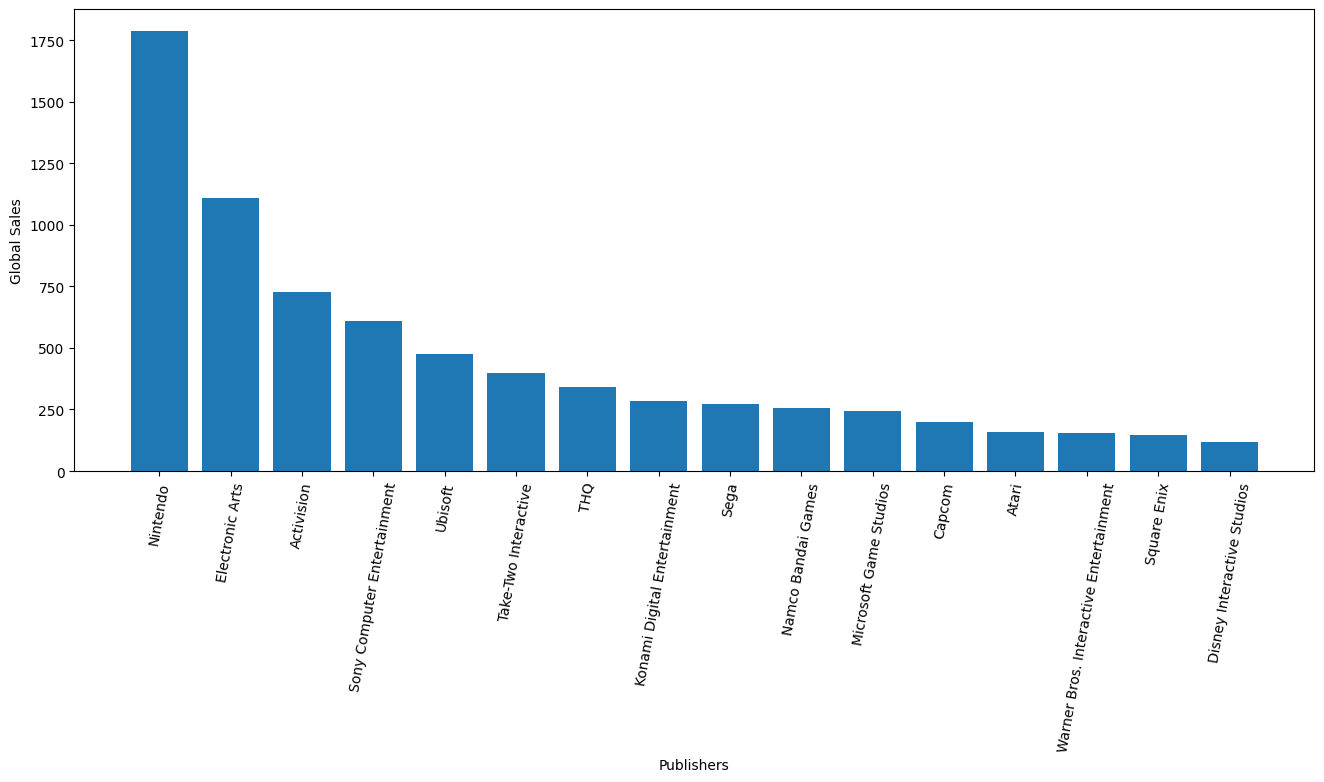

In [58]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=80)
plt.bar(top_sales_df.index, top_sales_df.values)
plt.xlabel('Publishers')
plt.ylabel('Global Sales')

Text(0, 0.5, 'Global Sales')

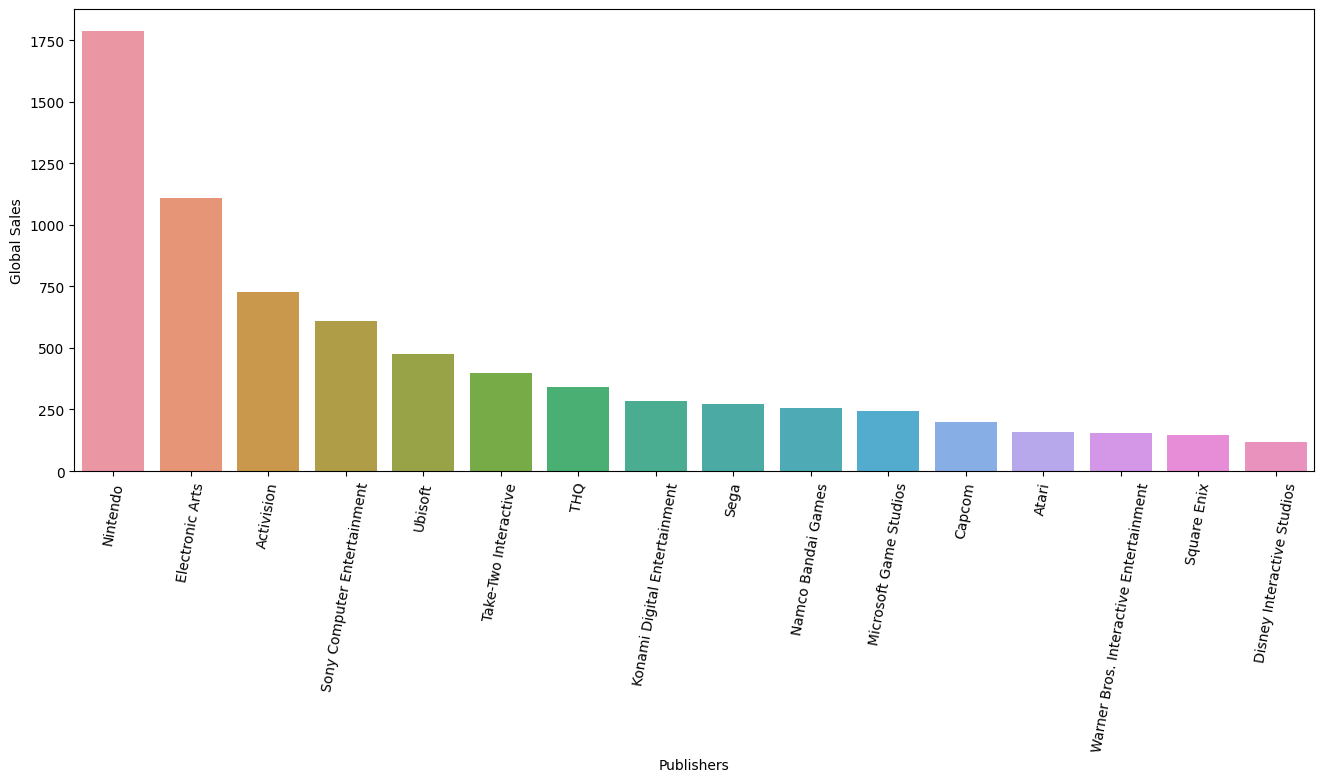

In [59]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=80)
sns.barplot(x=top_sales_df.index, y=top_sales_df.values)
plt.xlabel('Publishers')
plt.ylabel('Global Sales')

#### _From here, we see that Nintendo are the top earners even though they don't have the most published game which is EA. Nintendo have only 703 published games while EA have almost two times that which is 1351_

#### _So I am going to compare their more specialized sales to i.e between Nintedo and EA_

In [60]:
df_EA_Nintendo_Sales = df.groupby("Publisher").sum().loc[:, ["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales",  "Supposed Global Sales"]].loc[(df.groupby("Publisher").sum().loc[:, ["NA_Sales", "EU_Sales", "JP_Sales"]]).index.isin(["Nintendo", "Electronic Arts"]), :]
df_EA_Nintendo_Sales

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Supposed Global Sales
Publisher,,,,,
Electronic Arts,595.07,371.27,14.04,1110.32,1110.15
Nintendo,816.87,418.74,455.42,1786.56,1786.36


#### _I am sorry for the complex looking ncode, I am sure there is an easier way to do it_

#### _So i really don't know how to communicate this table to you with a visualization so you are just going to have to enjoy the table like that_

Text(0, 0.5, 'Sales')

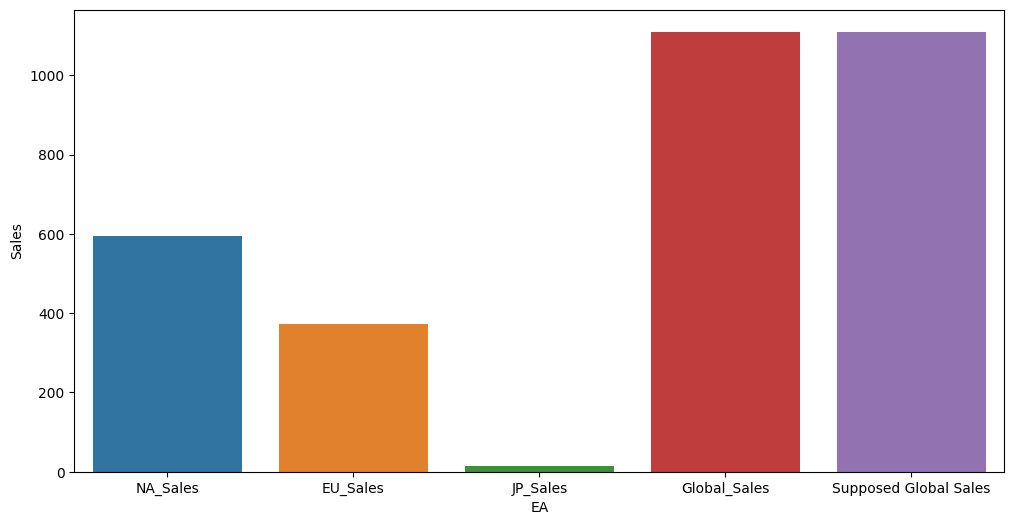

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_EA_Nintendo_Sales.columns, y=df_EA_Nintendo_Sales.iloc[0, :])
plt.xlabel("EA")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

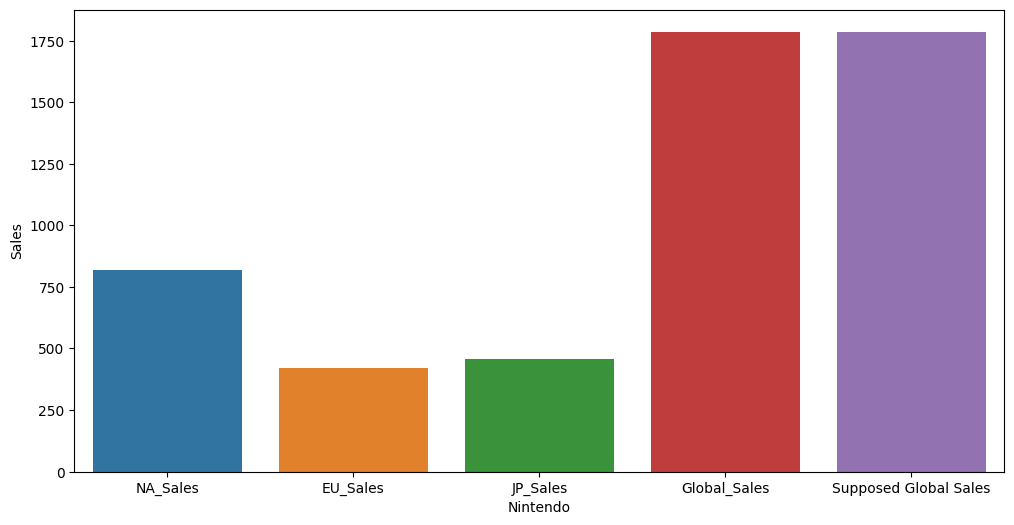

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_EA_Nintendo_Sales.columns, y=df_EA_Nintendo_Sales.iloc[1, :])
plt.xlabel("Nintendo")
plt.ylabel("Sales")

#### _From our table, we see that Nintendo Sales beats EA in every place but Japan's own is quite by a large margin_

#### _So I think i would just explore nintendo a little more_

In [63]:
df_nintendo = df[df['Publisher'] == 'Nintendo']
df_nintendo

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales,difference_between_supposed_global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,Greater,1.421085e-14
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,Equal,0.000000e+00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,Greater,1.000000e-02
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,Equal,0.000000e+00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,Greater,1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01,0.01,Equal,0.000000e+00
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01,0.01,Equal,0.000000e+00
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01,0.01,Equal,0.000000e+00
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01,0.01,Equal,0.000000e+00


#### _What is Nintendo's most sold game_

In [64]:
df_nintendo[['Name', 'Global_Sales']].sort_values(ascending=False, by='Global_Sales')

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
...,...,...
16269,Slide Adventure: Mag Kid,0.01
16357,Mario vs. Donkey Kong: Tipping Stars,0.01
16456,Art Academy: Home Studio,0.01
16473,Captain Rainbow,0.01


#### _We see that their most sold game is Wii sports_

#### _I want to see if that is the most sold game in the entire dataset_

In [65]:
df.sort_values(by='Global_Sales', ascending=False).iloc[:20, :]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales,difference_between_supposed_global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,Greater,1.421085e-14
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,Equal,0.000000e+00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,Greater,1.000000e-02
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,Equal,0.000000e+00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,Greater,1.000000e-02
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,30.26,Less,-3.552714e-15
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,30.01,Less,-3.552714e-15
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,29.01,Less,-1.000000e-02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,28.61,Less,-1.000000e-02
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,28.31,Equal,0.000000e+00


#### _We see that Nintendo published the 15 most sold games_

In [66]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales,difference_between_supposed_global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,Greater,1.421085e-14
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,Equal,0.000000e+00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,Greater,1.000000e-02
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,Equal,0.000000e+00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,Greater,1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,Less,-1.000000e-02
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01,Equal,0.000000e+00


#### _Which year had the most sales?_

In [67]:
df_Years_most_sales = df.groupby("Year").sum()['Global_Sales'].sort_values(ascending=False).iloc[:10]
df_Years_most_sales

Year
2008.0    678.90
2009.0    667.30
2007.0    611.13
2010.0    600.45
2006.0    521.04
2011.0    515.99
2005.0    459.94
2004.0    419.31
2002.0    395.52
2013.0    368.11
Name: Global_Sales, dtype: float64

Text(0.5, 1.0, 'Years and their Sales')

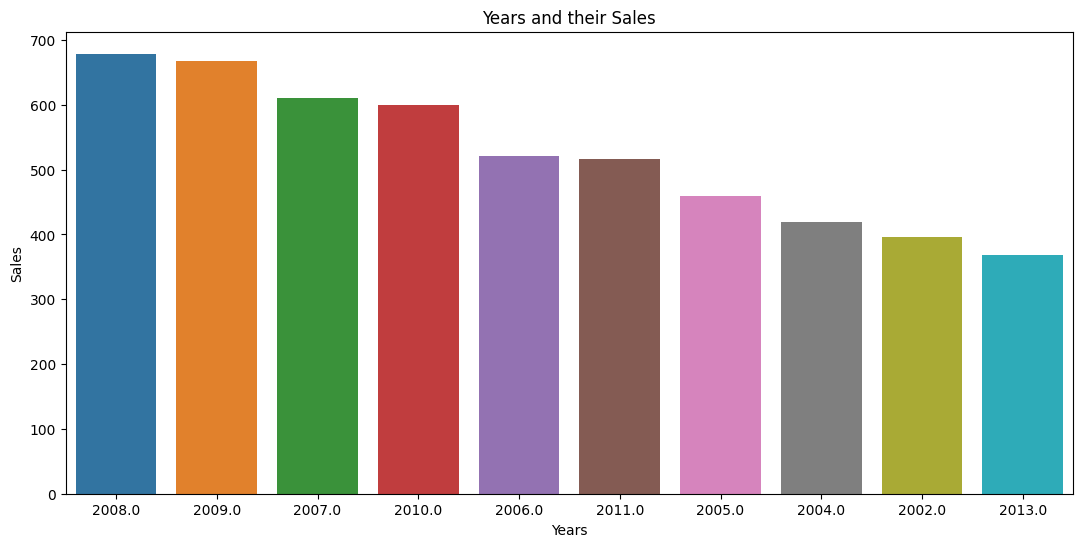

In [68]:
plt.figure(figsize=(13, 6))
sns.barplot(x=df_Years_most_sales.index, y=df_Years_most_sales, order=df_Years_most_sales.index)
plt.xlabel('Years')
plt.ylabel("Sales")
plt.title('Years and their Sales')

#### _Which Region has the most sales_

In [69]:
df.loc[:, ['NA_Sales', 'EU_Sales', "JP_Sales"]].sum()

NA_Sales    4392.95
EU_Sales    2434.13
JP_Sales    1291.02
dtype: float64

Text(0.5, 1.0, 'Regions and Sales')

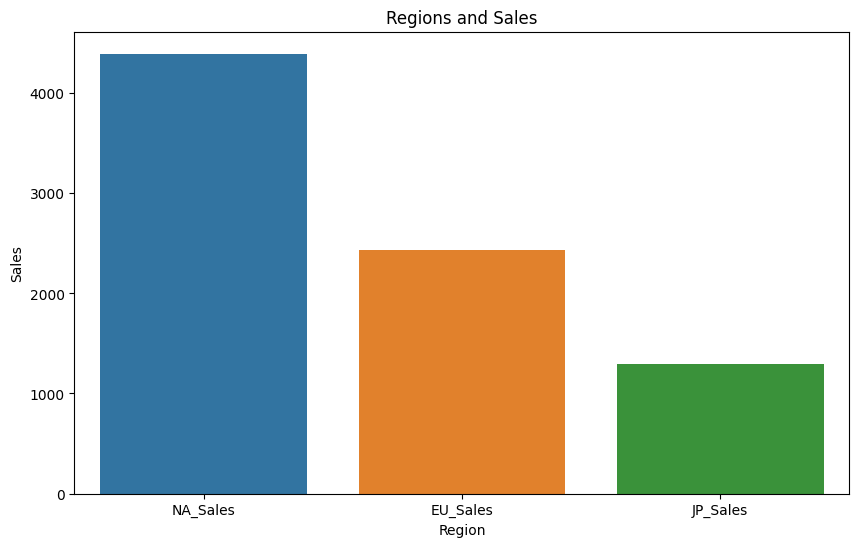

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.loc[:, ['NA_Sales', 'EU_Sales', "JP_Sales"]].sum().index, y=df.loc[:, ['NA_Sales', 'EU_Sales', "JP_Sales"]].sum())
plt.xlabel("Region")
plt.ylabel('Sales')
plt.title("Regions and Sales")

#### _North America has had the most sales_ 

#### _Let's see publishers in each region. I already did something similar but for only Nintendo and Electronic Arts_

In [71]:
df.groupby('Publisher').sum().loc[:, ['NA_Sales', "EU_Sales", "JP_Sales", "Global_Sales"]].sort_values(by="Global_Sales", ascending=False).iloc[:10, :]

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Publisher,,,,
Nintendo,816.87,418.74,455.42,1786.56
Electronic Arts,595.07,371.27,14.04,1110.32
Activision,429.70,215.53,6.54,727.46
Sony Computer Entertainment,265.22,187.72,74.10,607.50
Ubisoft,253.43,163.32,7.50,474.72
Take-Two Interactive,220.49,118.14,5.83,399.54
THQ,208.77,94.73,5.01,340.77
Konami Digital Entertainment,92.16,69.69,91.30,283.64
Sega,109.40,82.00,57.03,272.99


In [72]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Supposed Global Sales,Compared Supposed Against Actual Global Sales,difference_between_supposed_global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,Greater,1.421085e-14
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,Equal,0.000000e+00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,Greater,1.000000e-02
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,Equal,0.000000e+00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,Greater,1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01,Equal,0.000000e+00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,Less,-1.000000e-02
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01,Equal,0.000000e+00


## __SO WITH THIS I THINK I AM DONE EXPLORING MY DATA__

Do rank and global sales have a very strong positive correlation? Well I asked the wrong question I actually meant to ask do they have a strong -ve correlation. No, but they still have a negative correlation so the smallest rank number has the most sales and the largest rank number has the smallest gloabal sales.

Does NA sales + EU Sales + JP Sales = Global Sales? Most of the time yes but sometimes, they are either greater or less but the difference is usually very minute

Which platform has the most games released on it? DS

Which year has the most released games? 2009

What is the trend in the number of games released? The Trend: it increased significantly from 1980 to 2009 and started dropping significantly

Which genre has the most sales? Sports

In each Genre, what is the top selling games? Sports	Wii Sports
1	Platform	Super Mario Bros.
2	Racing	Mario Kart Wii
4	Role-Playing	Pokemon Red/Pokemon Blue
5	Puzzle	Tetris
7	Misc	Wii Play
9	Shooter	Duck Hunt
10	Simulation	Nintendogs
16	Action	Grand Theft Auto V
39	Fighting	Super Smash Bros. Brawl
50	Adventure	Super Mario Land 2: 6 Golden Coins
165	Strategy	Pokemon Stadium


Which publisher publishes the most? EA sport publishes the most games.

What genre of game is published most by EA? They live up to their name - 
EA sports

What sport game is published most by EA? Well I didn't really know how to go about this but sha i think it is FIFA

What platform were FIFA games most published on? PS2

What were the particular FIFA games published on PS2? FIFA Soccer 06
283                          FIFA Soccer 07
334                        FIFA Soccer 2005
377                        FIFA Soccer 2004
392                        FIFA Soccer 2003
440                          FIFA Soccer 08
701                          FIFA Soccer 09
1050                         FIFA Soccer 10
2487         FIFA Soccer World Championship
2709                         FIFA Soccer 11
3224                       FIFA Soccer 2002
3405                    2002 FIFA World Cup
3542            FIFA World Cup Germany 2006
5143                          FIFA Street 2
5722                            FIFA Street
10711                Project FIFA World Cup
10989        FIFA 2001: Major League Soccer
11224                               FIFA 12
13611    FIFA Soccer 2003 (weekly jp sales)

The number of each genres publishers have published? So, we can see that most publishers have mostly published action games and the only games that have mainly ever beat action are sport games from EA and Konami and others

Which genre is published most every year considering only major years of publications? We can see that every  year, action games be topping the chart


Which publisher has earned the most? From here, we see that Nintendo is the top earner even though they don't have the most published game which is EA. Nintendo have only 703 published games while EA have almost two times that which is 1351. When comparing both of them in more specialized regions like North America,  Europe and Japan Nintendo beats EA everywhere in terms of sales.


What is Nintendo's most sold game? We see that their most sold game is Wii sports which is the most sold game in the entire dataset. It is also important to note that nintendo publishe the 15 most sold games


Which year had the most sales? 2008

Which Region has the most sales? North America has had the most sales